In [2]:
from pydantic import BaseModel
from typing import Literal

class PortFolioState(BaseModel):
    amount_yuan: float
    total_yuan: float
    target_currency: Literal["INR", "RUB"]
    total: float

In [ ]:
def calculate_total_with_interest(state: PortFolioState) -> PortFolioState:
    state.total_yuan += state.amount_yuan * 1.05
    return state

def convert_yuan_to_inr(state: PortFolioState) -> PortFolioState:
    exchange_rate = 12.30
    state.total = state.total_yuan * exchange_rate
    return state

def convert_yuan_to_rub(state: PortFolioState) -> PortFolioState:
    exchange_rate = 13.2
    state.total = state.total_yuan * exchange_rate
    return state

def choose_conversion(state: PortFolioState) -> str:
    return state.target_currency

In [5]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph(PortFolioState)

builder.add_node("calculate_total_with_interest", calculate_total_with_interest)
builder.add_node("convert_yuan_to_inr", convert_yuan_to_inr)
builder.add_node("convert_yuan_to_rub", convert_yuan_to_rub)

builder.add_edge(START, "calculate_total_with_interest")
builder.add_conditional_edges("calculate_total_with_interest", choose_conversion, {
    "INR": "convert_yuan_to_inr",
    "RUB": "convert_yuan_to_rub"
})
builder.add_edge(["convert_yuan_to_inr", "convert_yuan_to_rub"], END)
graph = builder.compile()

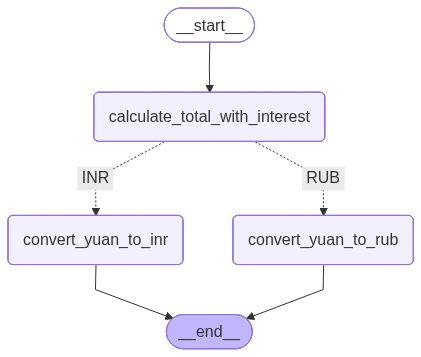

In [6]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({
    "amount_yuan": 1000,
    "target_currency": "INR",
    "total_yuan": 0,
    "total": 0
})

{'amount_yuan': 1000.0,
 'total_yuan': 50.0,
 'target_currency': 'INR',
 'total': 615.0}